In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork
 

# Linear

In [5]:
num_meta_epochs = 3# 100#100#10
num_epochs = 10#15#10#3#50#50#15#5#25#50
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
num_neurons_nonlinear = [10,10,10,10,5]
learning_rate = 0.001#None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal, 'activations': [tf.nn.leaky_relu]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':True}


#{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
#                                     <function leaky_relu at 0x11fcedd08>,
#                                     <function leaky_relu at 0x11fcedd08>],
 #                 'initialisation_scheme': tf.contrib.layers.xavier_initializer,
 #                 'learning_rate': 0.001,
 #                 'num_neurons': [10, 10, 10],
 #                 'seed': 100},
 #   'score': 0.0882077880301202,
 #   'var': 2.441656843781423e-05}

## Dropout

{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.0882077880301202,
    'var': 2.441656843781423e-05}

In [10]:
num_meta_epochs = 3# 100#100#10
num_epochs = 10#15#10#3#50#50#15#5#25#50
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
num_neurons_nonlinear = [10,10,10,10,5]
learning_rate = 0.001#None#1/num_epochs
dropout_model_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.leaky_relu]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':True}



experiment started at 2018-08-10 08:26:52.146151
experiment number 1 took 5.882333755493164 seconds. That means the whole run will probably take 17.647001266479492 more seconds and 0.2941166877746582 more minutes.
overall, it took 17.910939693450928 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.488940  0.938889  0.953373  0.005516
std    0.245886  0.019245  0.002487  0.000779
min    0.330824  0.916667  0.950779  0.004771
25%    0.347297  0.933333  0.952191  0.005112
50%    0.363770  0.950000  0.953603  0.005453
75%    0.567999  0.950000  0.954670  0.005889
max    0.772227  0.950000  0.955736  0.006325
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.488940 &  0.938889 &  0.953373 &  0.005516 \\
std   &  0.245886 &  0.019245 &  0.002487 &  0.000779 \\
min   &  0.330824 &  0.916667 &  0.950779 &

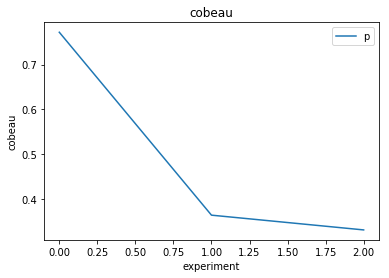

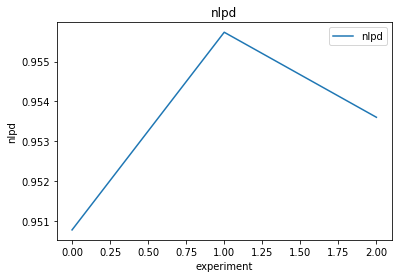

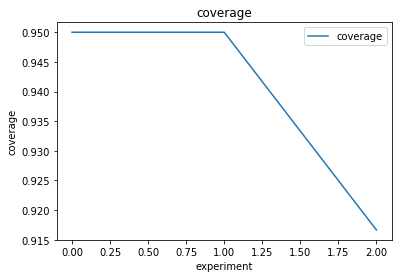

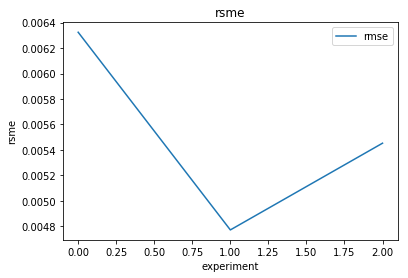

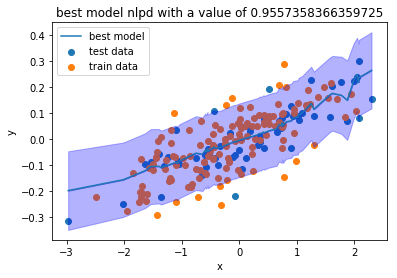

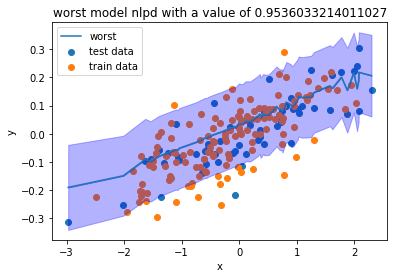

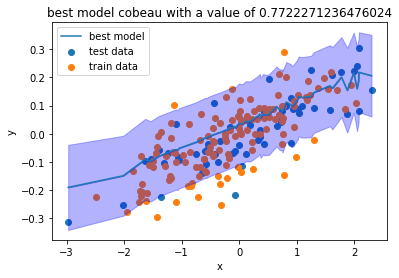

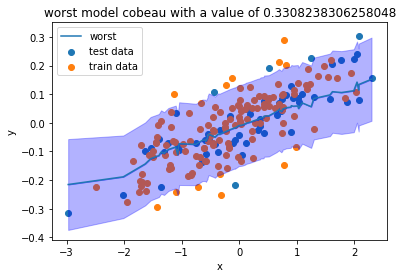

In [11]:
pd_dropout = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=dropout_model_params,dataset_params=dataset_params)

## Bootstrap
{   'params': {   'activations': [   <function tanh at 0x11f7257b8>,
                                     <function tanh at 0x11f7257b8>,
                                     <function tanh at 0x11f7257b8>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.07280524333917246,
    'var': 1.0473625661994142e-05}

In [18]:
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
learning_rate = 0.001

bootstrap_model_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.tanh]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':False}



experiment started at 2018-08-10 08:34:56.423031
experiment number 1 took 19.047886848449707 seconds. That means the whole run will probably take 57.14366054534912 more seconds and 0.9523943424224853 more minutes.
overall, it took 55.103206157684326 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.719498  0.011111  0.994704  0.004779
std    0.124766  0.019245  0.858994  0.000374
min    0.635825  0.000000  0.226178  0.004549
25%    0.647797  0.000000  0.531050  0.004562
50%    0.659769  0.000000  0.835923  0.004576
75%    0.761335  0.016667  1.378966  0.004893
max    0.862901  0.033333  1.922010  0.005211
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.719498 &  0.011111 &  0.994704 &  0.004779 \\
std   &  0.124766 &  0.019245 &  0.858994 &  0.000374 \\
min   &  0.635825 &  0.000000 &  0.226178 &

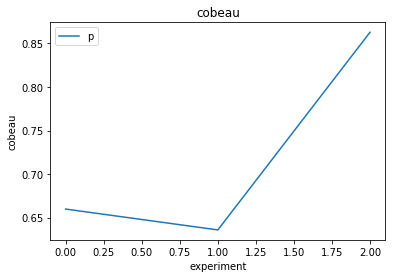

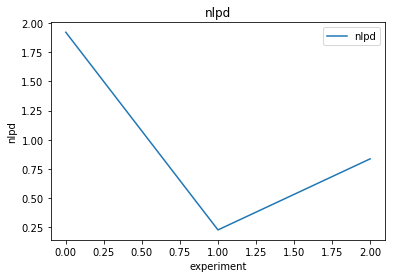

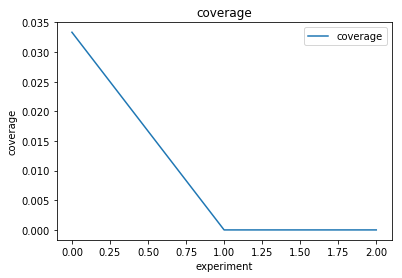

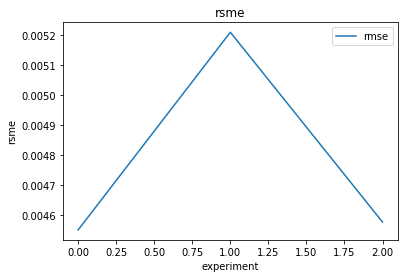

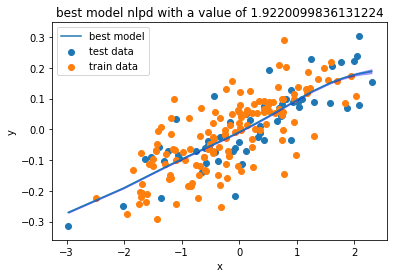

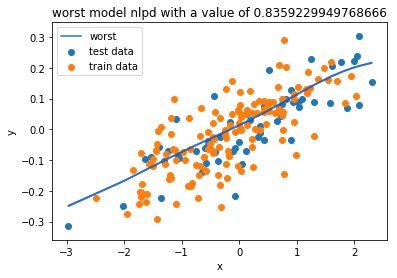

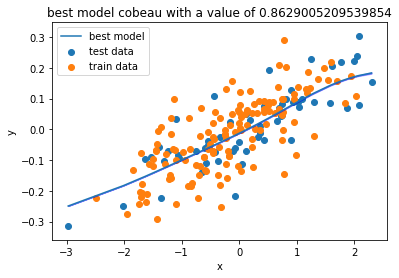

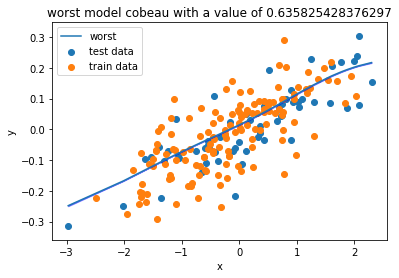

In [19]:
pd_bootstrap = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=bootstrap_model_params,
                                 dataset_params=dataset_params)

experiment started at 2018-08-09 12:54:13.362885
experiment number 1 took 8.478510856628418 seconds. That means the whole run will probably take 25.435532569885254 more seconds and 0.4239255428314209 more minutes.
overall, it took 27.683566093444824 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.207146  0.072222  1.612543  0.011572
std    0.304615  0.050918  0.307009  0.006489
min    0.028760  0.016667  1.420855  0.006352
25%    0.031282  0.050000  1.435492  0.007939
50%    0.033805  0.083333  1.450130  0.009526
75%    0.296339  0.100000  1.708387  0.014181
max    0.558873  0.116667  1.966644  0.018836
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.207146 &  0.072222 &  1.612543 &  0.011572 \\
std   &  0.304615 &  0.050918 &  0.307009 &  0.006489 \\
min   &  0.028760 &  0.016667 &  1.420855 &

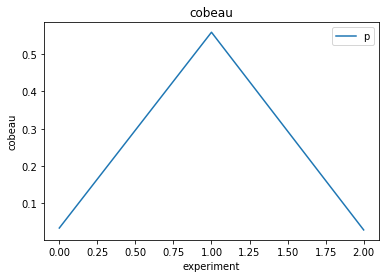

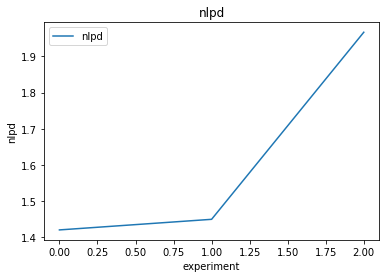

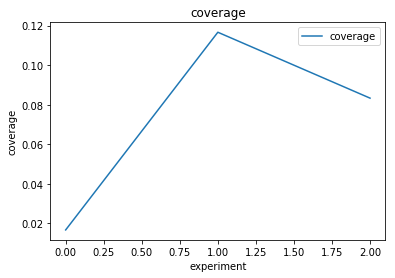

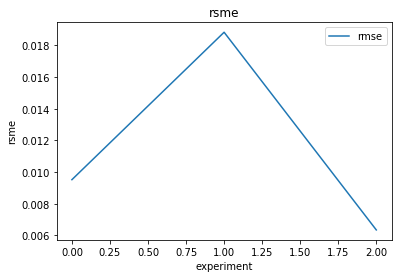

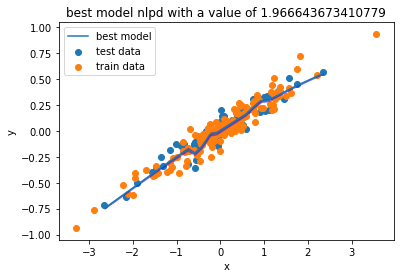

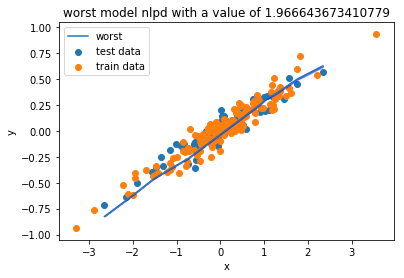

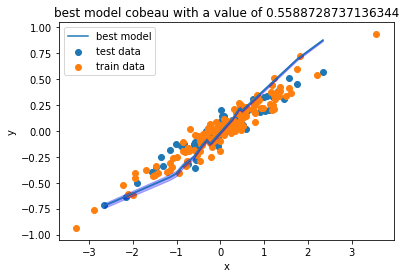

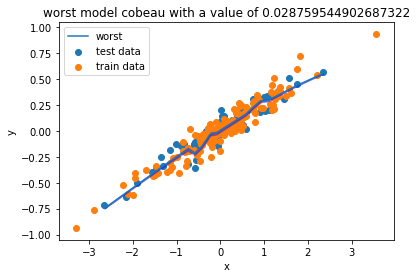

In [4]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:54:51.880039
experiment number 1 took 15.30378270149231 seconds. That means the whole run will probably take 45.91134810447693 more seconds and 0.7651891350746155 more minutes.
overall, it took 43.749171018600464 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.496904  0.094444  1.884435  0.007317
std    0.081702  0.025459  0.024170  0.001014
min    0.428120  0.066667  1.859335  0.006552
25%    0.451749  0.083333  1.872877  0.006742
50%    0.475379  0.100000  1.886419  0.006931
75%    0.531296  0.108333  1.896985  0.007699
max    0.587213  0.116667  1.907552  0.008467
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.496904 &  0.094444 &  1.884435 &  0.007317 \\
std   &  0.081702 &  0.025459 &  0.024170 &  0.001014 \\
min   &  0.428120 &  0.066667 &  1.859335 & 

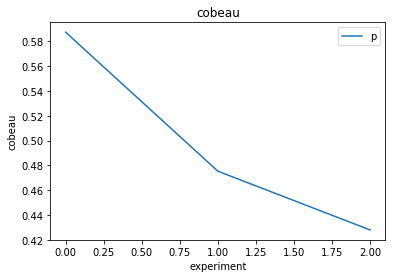

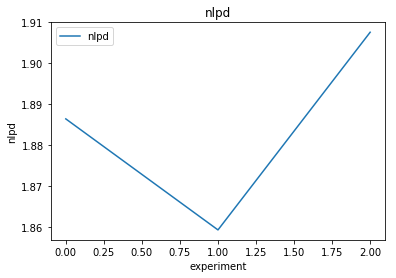

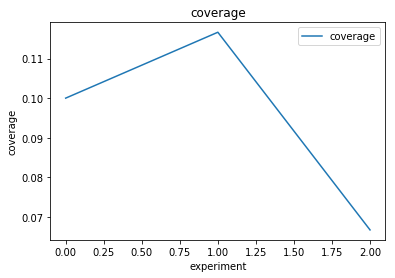

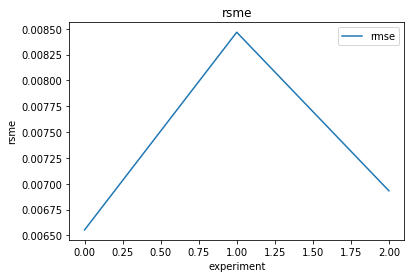

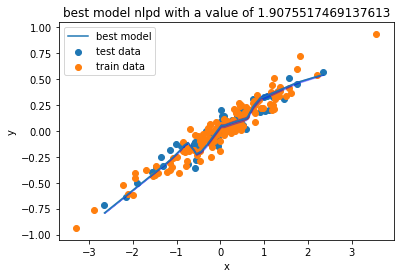

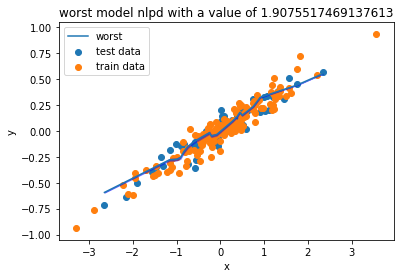

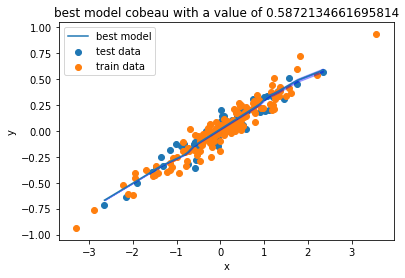

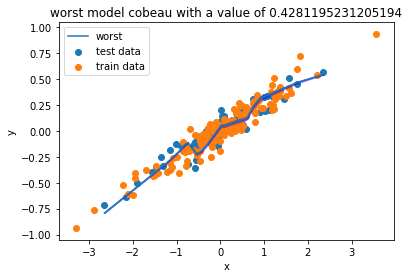

In [5]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':[4, 5,5, 4, 2]}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = 1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,'num_epochs':num_epochs,'seed':seed,
               'l2':True}#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-09 12:55:47.497240
experiment number 1 took 9.782469749450684 seconds. That means the whole run will probably take 29.34740924835205 more seconds and 0.4891234874725342 more minutes.
overall, it took 30.237916946411133 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.441933  0.350000  0.485713  0.138286
std    0.339417  0.033333  0.055887  0.018523
min    0.050372  0.316667  0.421718  0.126235
25%    0.336734  0.333333  0.466115  0.127622
50%    0.623095  0.350000  0.510512  0.129009
75%    0.637714  0.366667  0.517710  0.144312
max    0.652333  0.383333  0.524909  0.159614
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.441933 &  0.350000 &  0.485713 &  0.138286 \\
std   &  0.339417 &  0.033333 &  0.055887 &  0.018523 \\
min   &  0.050372 &  0.316667 &  0.421718 & 

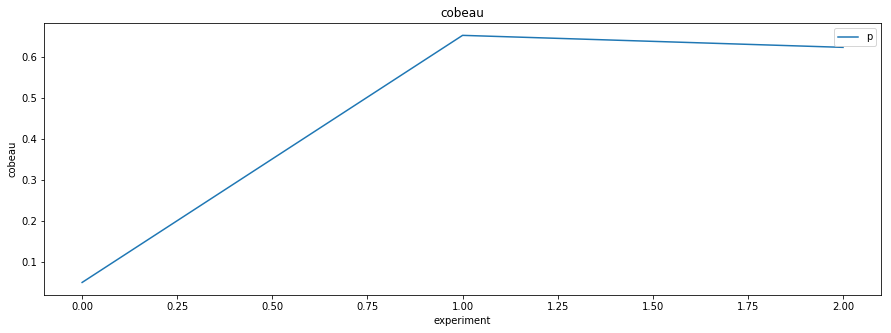

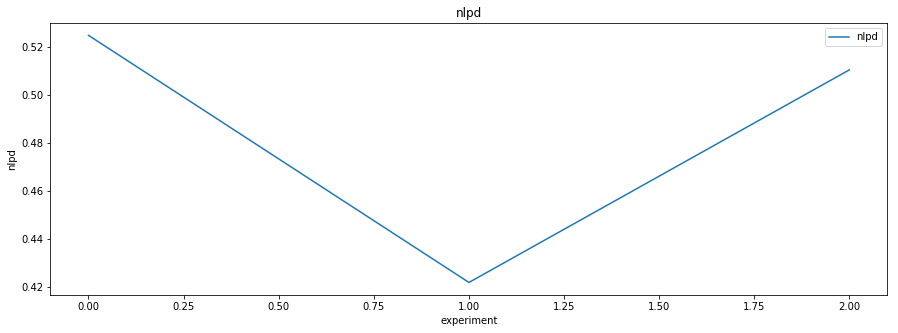

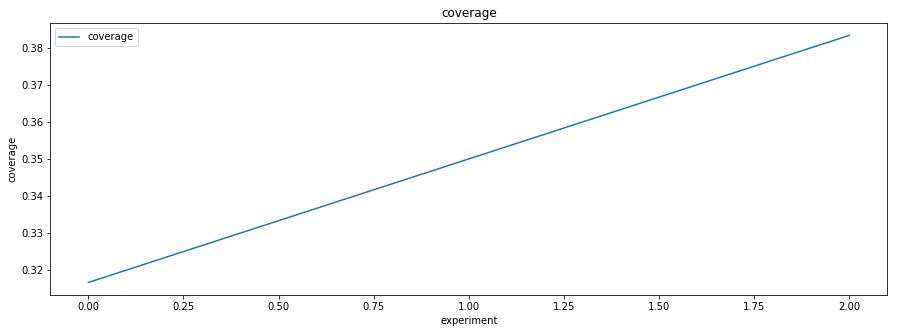

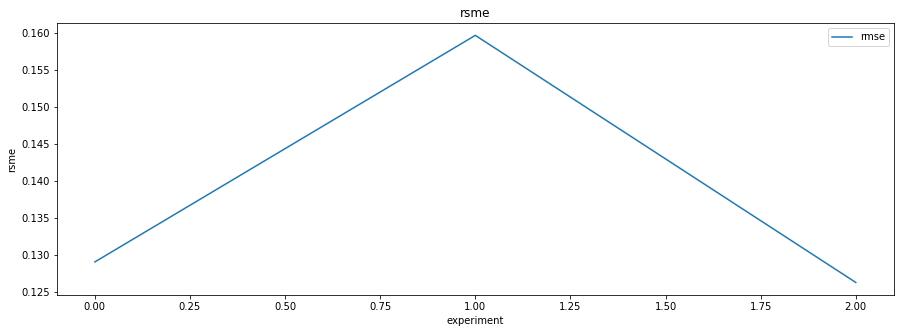

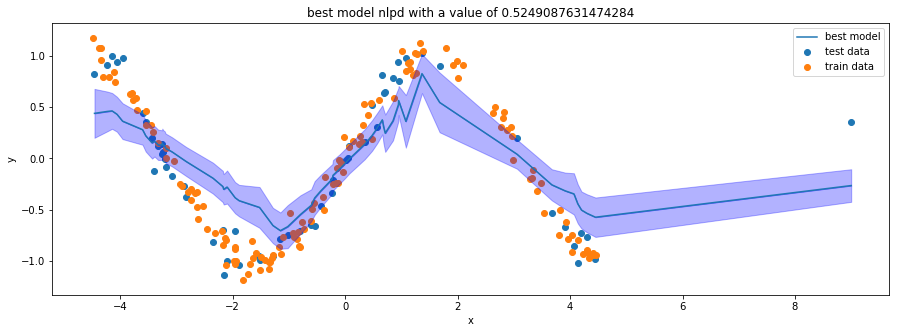

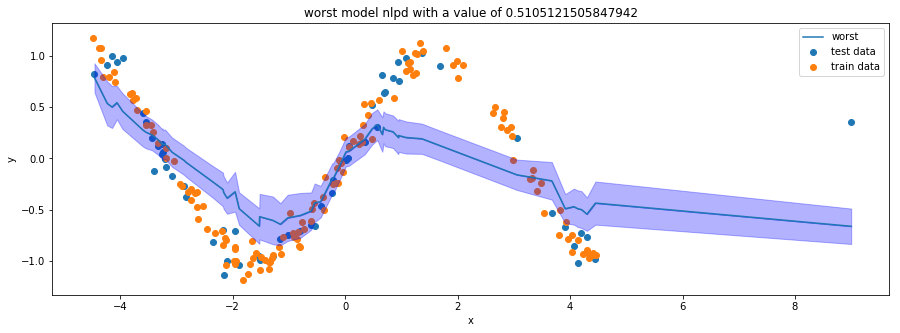

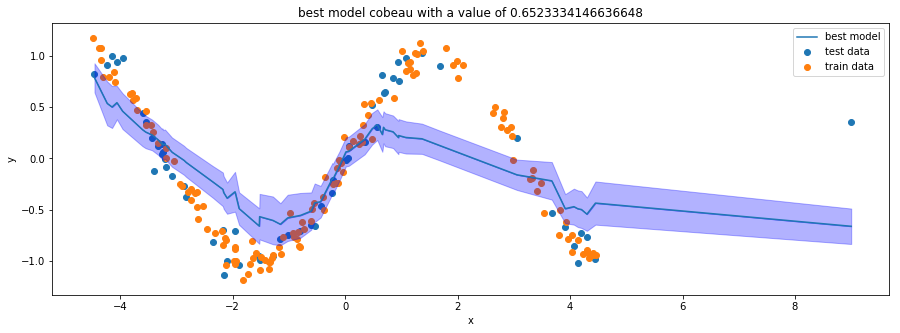

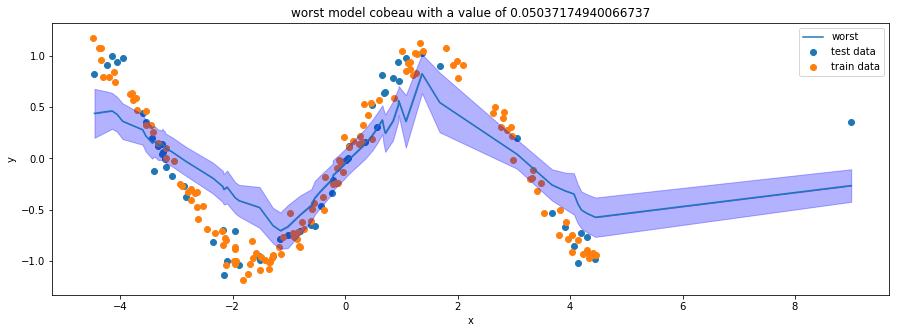

In [7]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:56:26.147678
experiment number 1 took 11.309738874435425 seconds. That means the whole run will probably take 33.929216623306274 more seconds and 0.5654869437217712 more minutes.
overall, it took 45.83802771568298 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   2.115363e-01  0.322222  0.679703  0.578141
std    3.663917e-01  0.254588  0.734571  0.919647
min    3.779183e-42  0.100000 -0.162324  0.031598
25%    1.283184e-08  0.183333  0.424931  0.047259
50%    2.566368e-08  0.266667  1.012187  0.062921
75%    3.173045e-01  0.433333  1.100717  0.851413
max    6.346090e-01  0.600000  1.189246  1.639904
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  2.115363e-01 &  0.322222 &  0.679703 &  0.578141 \\
std   &  3.663917e-01 &  0.254588 &  0.734571 &  0.9

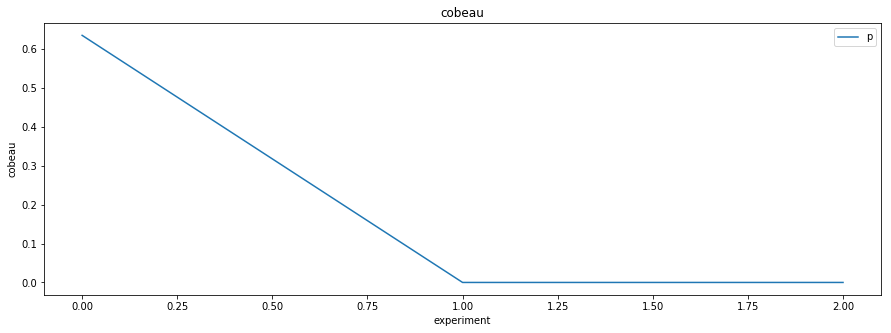

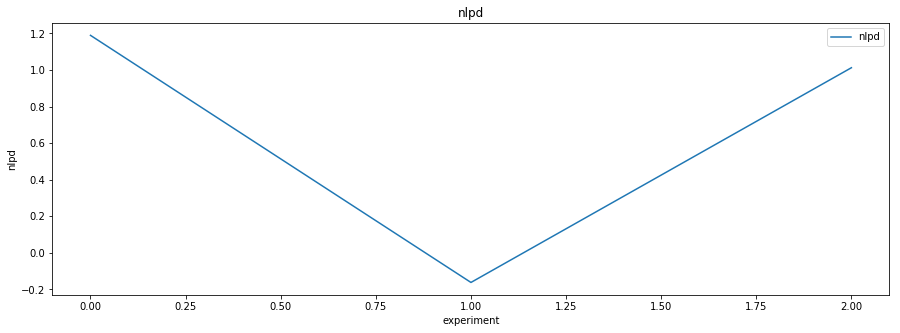

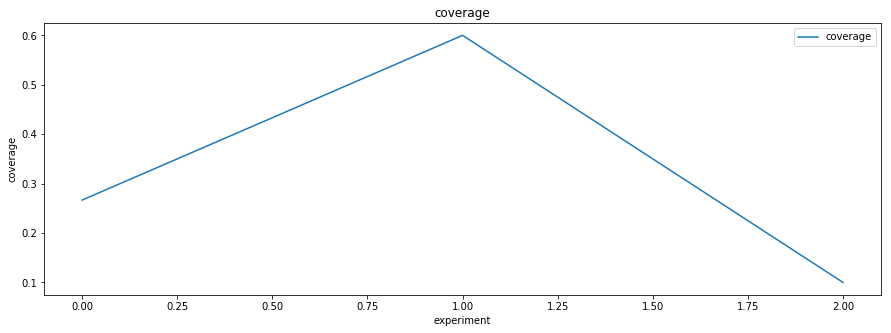

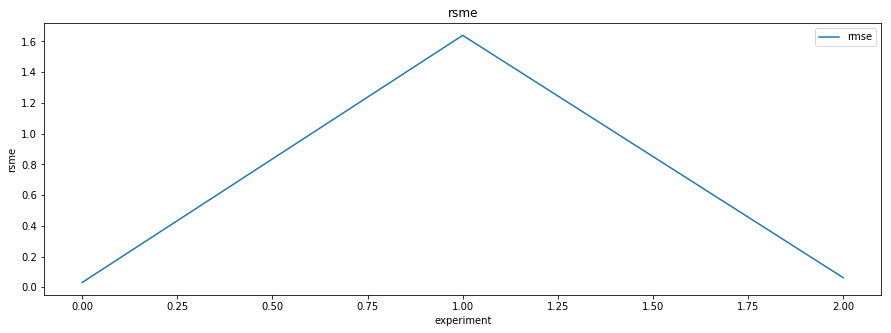

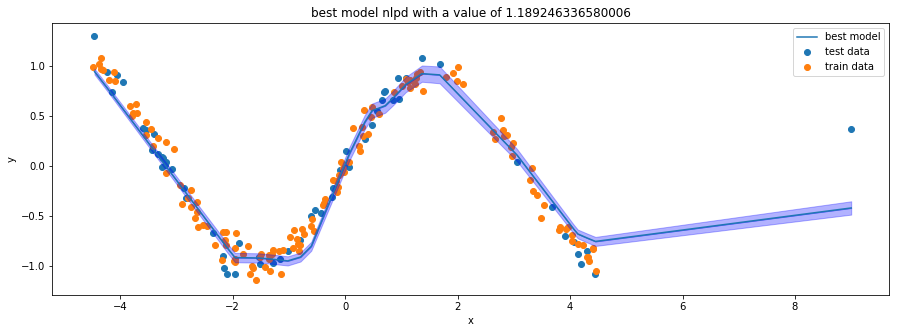

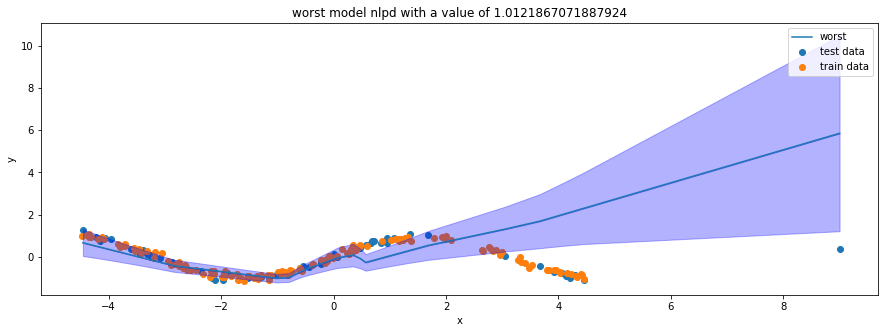

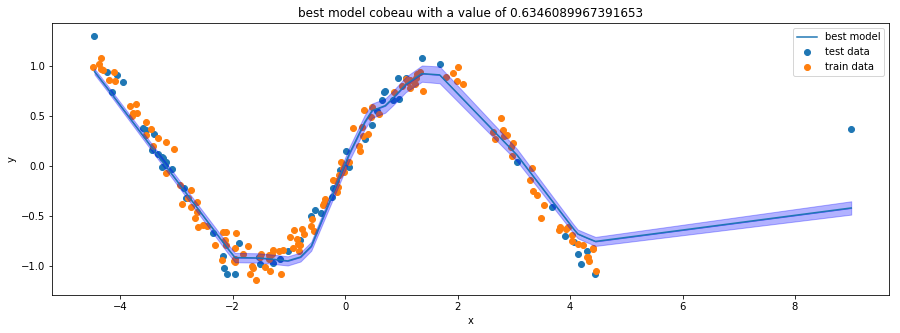

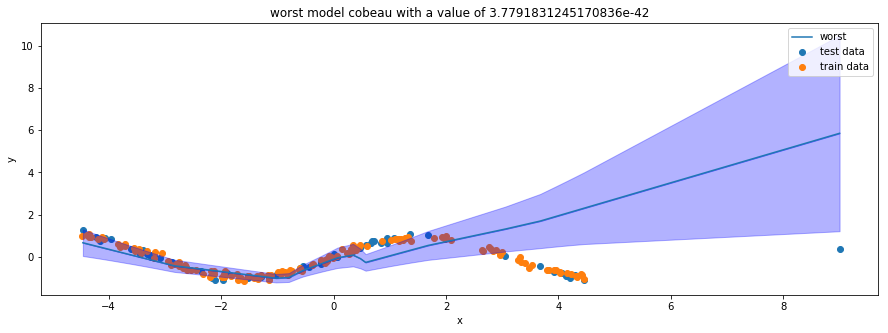

In [8]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:57:20.954553
experiment number 1 took 9.648128986358643 seconds. That means the whole run will probably take 28.944386959075928 more seconds and 0.48240644931793214 more minutes.
overall, it took 30.640379905700684 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.261734  0.372222 -31.377625  0.140819
std    0.129312  0.085527  36.971436  0.074584
min    0.115764  0.300000 -71.865246  0.078771
25%    0.211630  0.325000 -47.361515  0.099445
50%    0.307496  0.350000 -22.857783  0.120120
75%    0.334719  0.408333 -11.133814  0.171843
max    0.361942  0.466667   0.590155  0.223566
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &       nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &   3.000000 &  3.000000 \\
mean  &  0.261734 &  0.372222 & -31.377625 &  0.140819 \\
std   &  0.129312 &  0.085527 &  36.971436 &  0.074584 \\
min   &  0.115764 &  0.300000

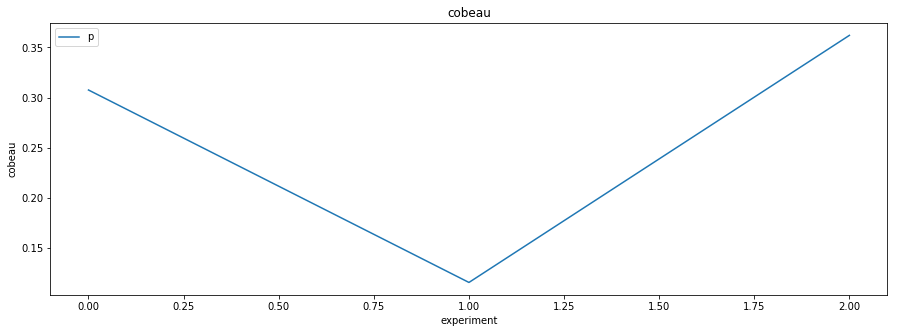

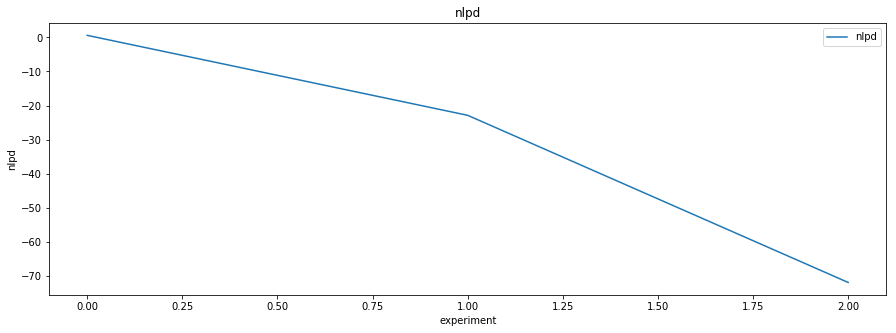

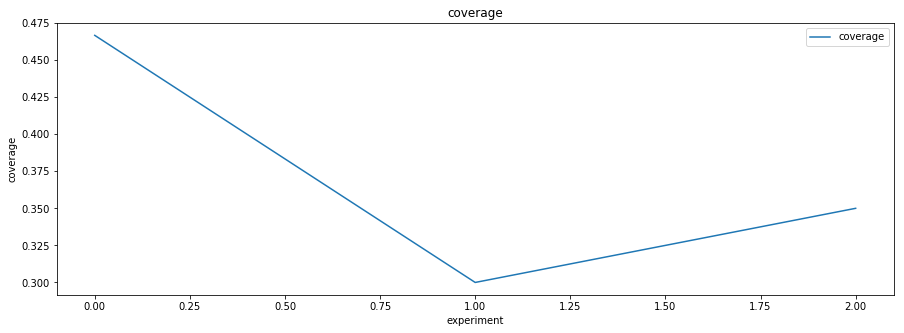

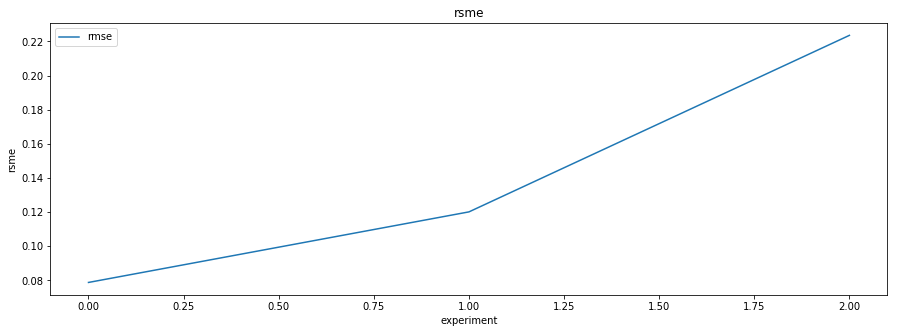

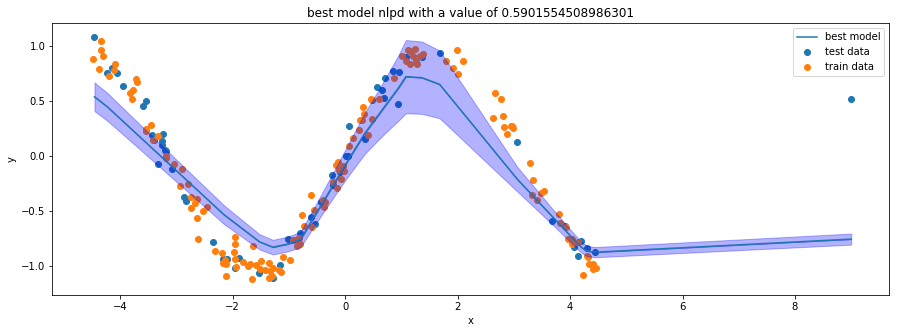

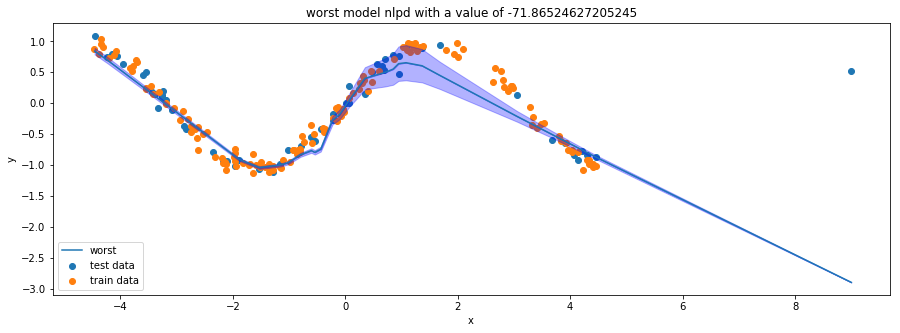

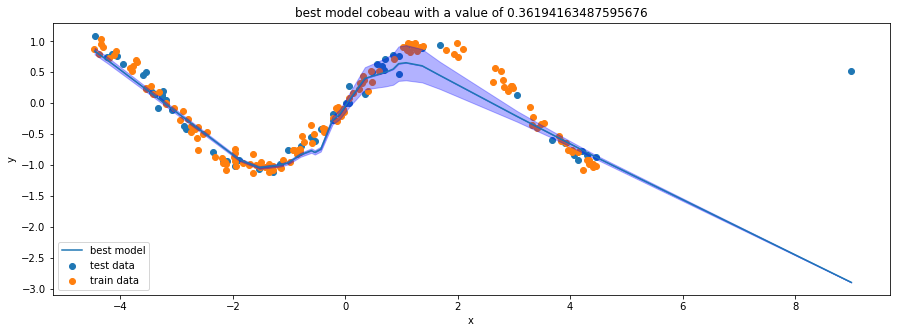

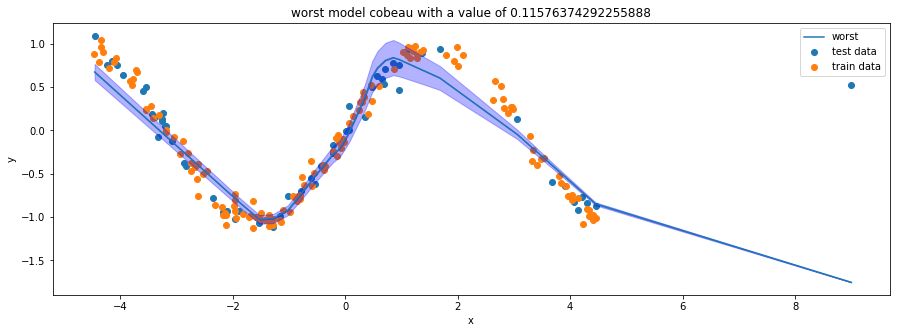

In [9]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [10]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-09 12:57:59.375605
experiment number 1 took 7.164386034011841 seconds. That means the whole run will probably take 21.493158102035522 more seconds and 0.358219301700592 more minutes.
overall, it took 25.8393611907959 seconds with 3 experiments
             cobeau  coverage        nlpd        rsme
count  3.000000e+00  3.000000    3.000000    3.000000
mean   1.375763e-07  0.785311  -73.242401  294.566381
std    2.325048e-07  0.083608   62.927333   30.049386
min    7.451695e-11  0.728814 -128.160460  275.983778
25%    3.352990e-09  0.737288 -107.574430  277.232343
50%    6.631463e-09  0.745763  -86.988400  278.480908
75%    2.063272e-07  0.813559  -45.783372  303.857683
max    4.060230e-07  0.881356   -4.578343  329.234459
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &        nlpd &        rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &    3.000000 &    3.000000 \\
mean  &  1.375763e-07 &  0.785311 &  -73.242401 &  294.566381 \\
std   &

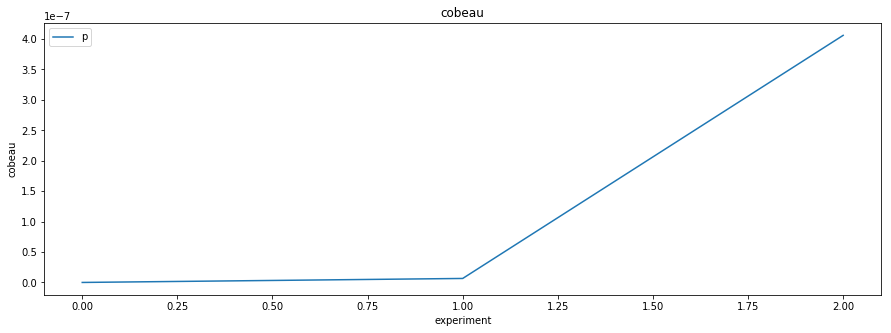

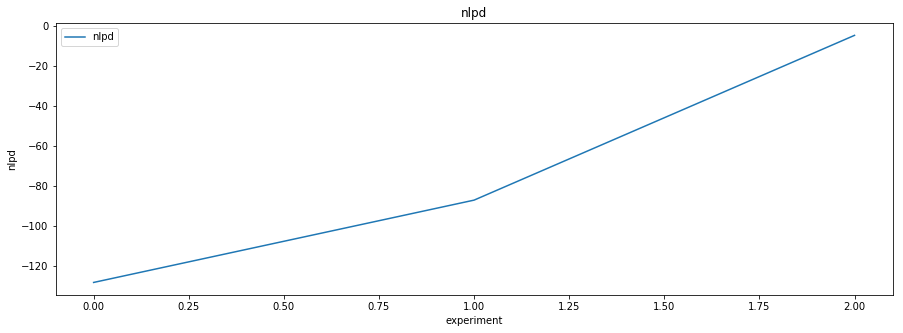

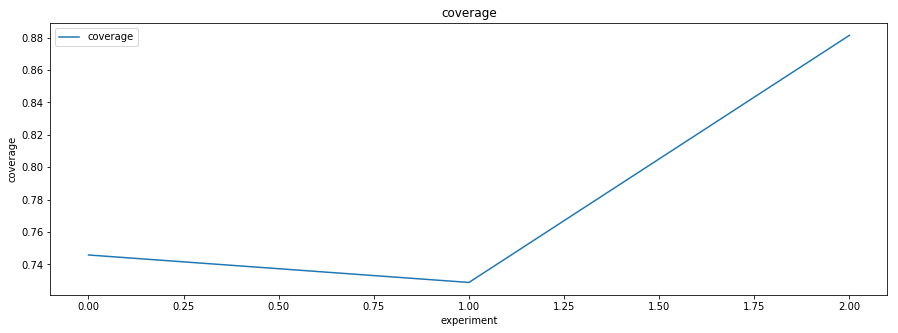

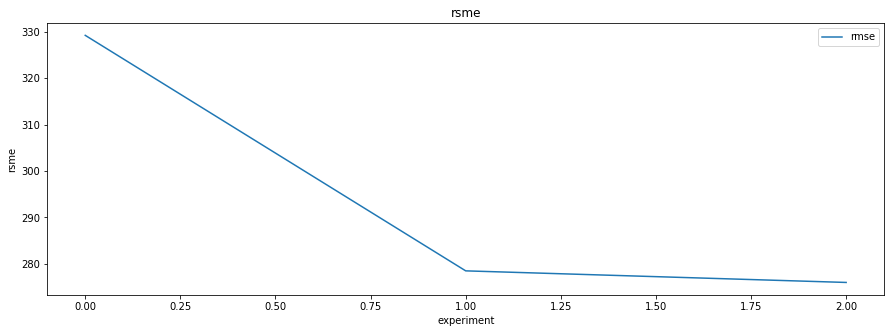

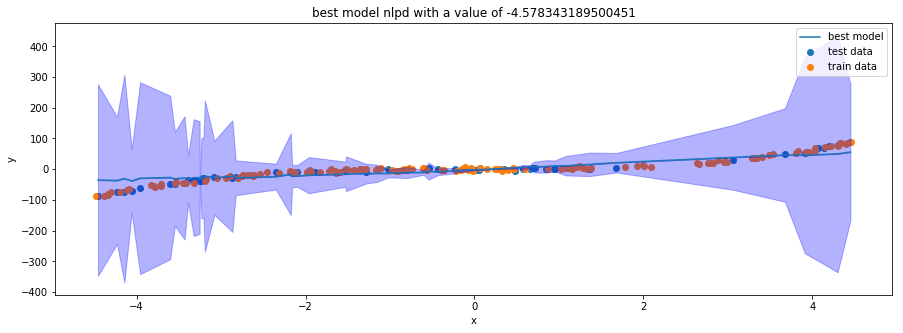

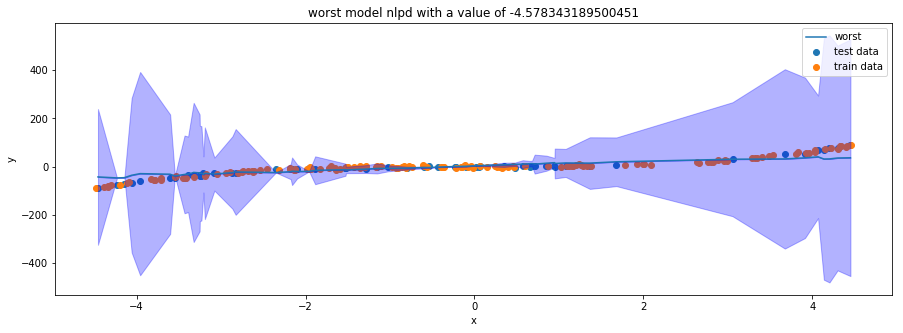

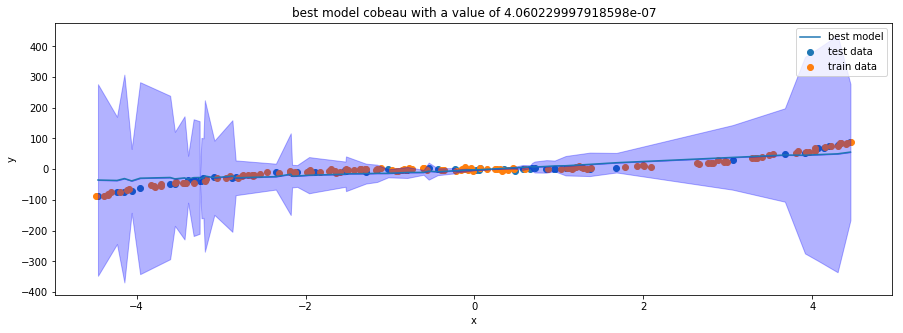

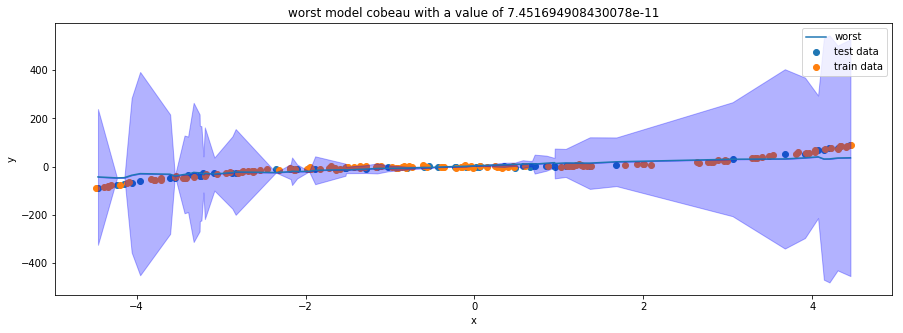

In [11]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:58:31.392635
experiment number 1 took 11.72897219657898 seconds. That means the whole run will probably take 35.18691658973694 more seconds and 0.586448609828949 more minutes.
overall, it took 37.882965087890625 seconds with 3 experiments
             cobeau  coverage           nlpd         rsme
count  3.000000e+00  3.000000       3.000000     3.000000
mean   9.486113e-04  0.553672 -218031.441732  1050.322599
std    1.642879e-03  0.298581  377598.423035   691.109889
min    2.369901e-13  0.237288 -654044.543992   405.008372
25%    9.437916e-08  0.415254 -327038.962305   685.702355
50%    1.887581e-07  0.593220     -33.380618   966.396338
75%    1.422917e-03  0.711864     -24.890603  1372.979712
max    2.845645e-03  0.830508     -16.400587  1779.563086
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &           nlpd &         rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &       3.000000 &     3.000000 \\
mean  &  9.486113e-04 &  0.

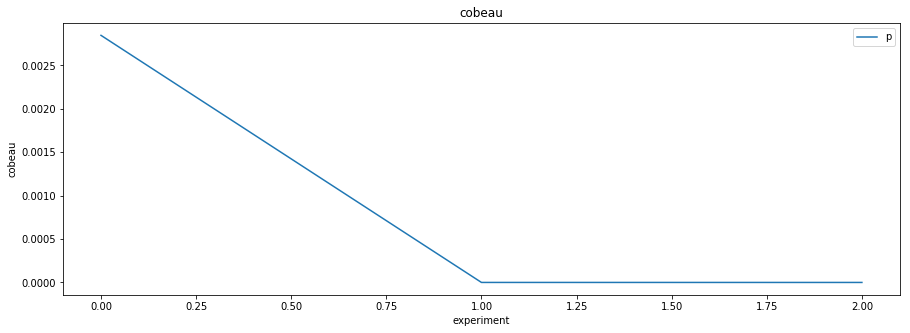

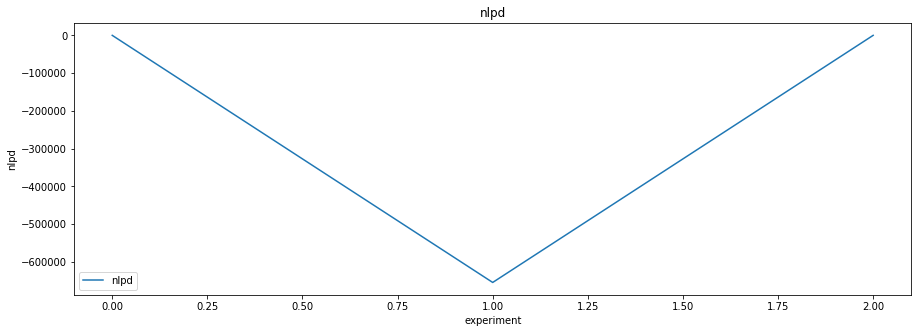

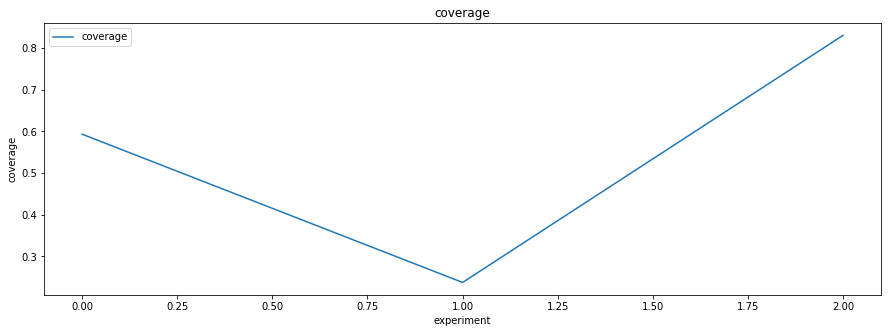

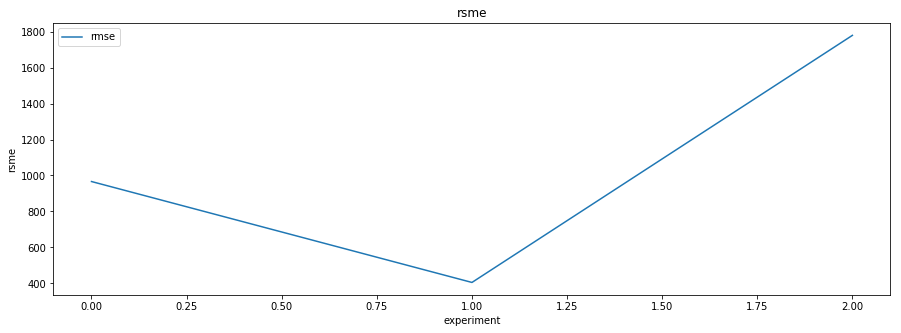

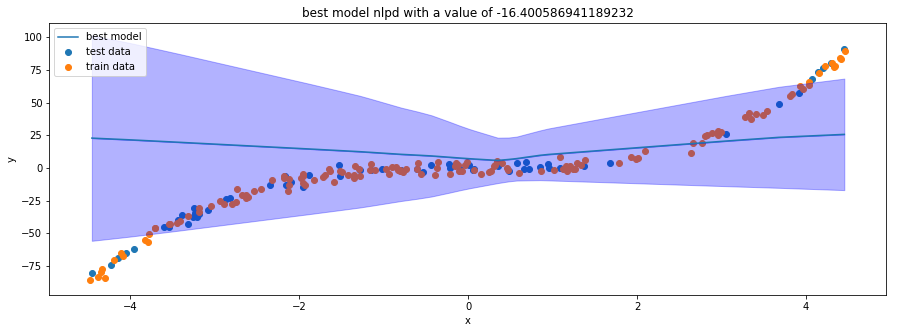

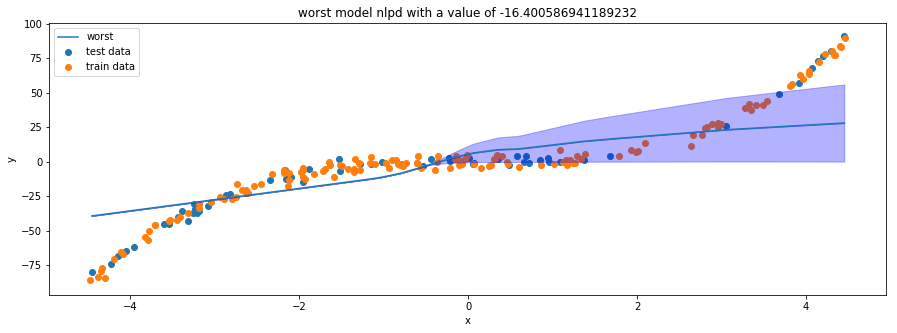

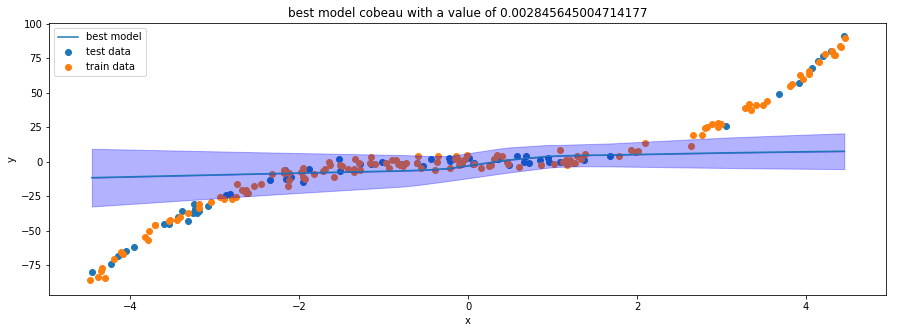

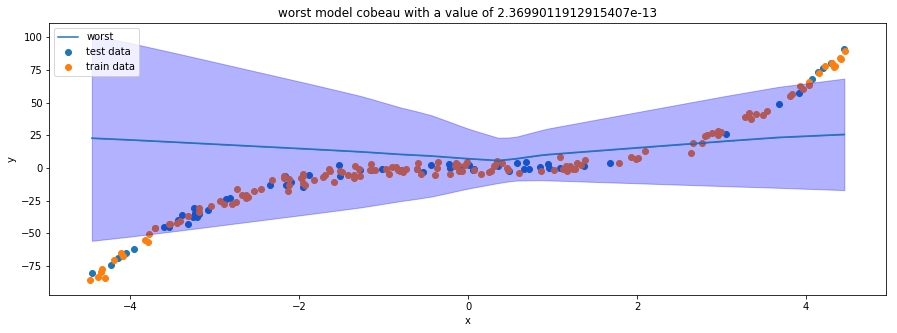

In [12]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:59:18.437494
experiment number 1 took 11.134526252746582 seconds. That means the whole run will probably take 33.403578758239746 more seconds and 0.5567263126373291 more minutes.
overall, it took 33.812209129333496 seconds with 3 experiments
             cobeau  coverage       nlpd         rsme
count  3.000000e+00  3.000000   3.000000     3.000000
mean   1.615925e-04  0.943503  -5.955519   499.501197
std    2.771585e-04  0.097856   5.251524   556.422354
min    7.693209e-16  0.830508 -12.013110    99.670290
25%    1.577582e-06  0.915254  -7.590009   181.766480
50%    3.155165e-06  1.000000  -3.166909   263.862670
75%    2.423888e-04  1.000000  -2.926723   699.416651
max    4.816224e-04  1.000000  -2.686537  1134.970631
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &       nlpd &         rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &   3.000000 &     3.000000 \\
mean  &  1.615925e-04 &  0.943503 &  -5.955519 &   499.501197 \\
std

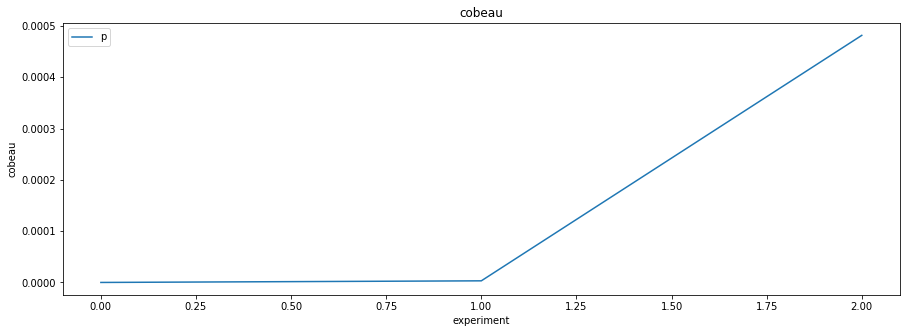

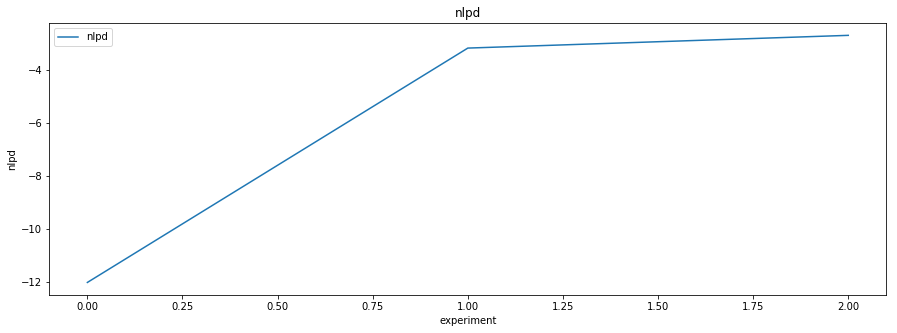

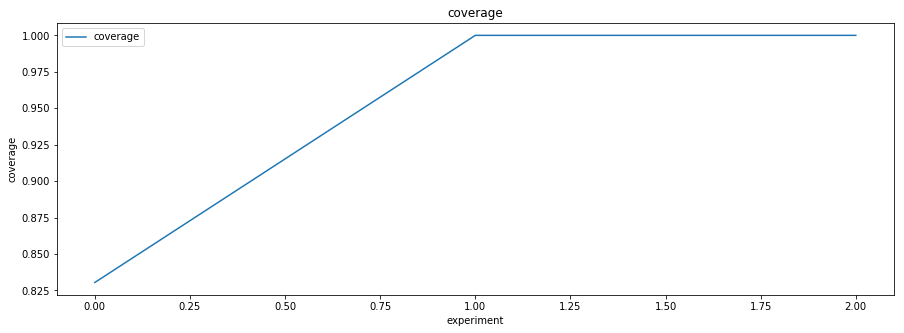

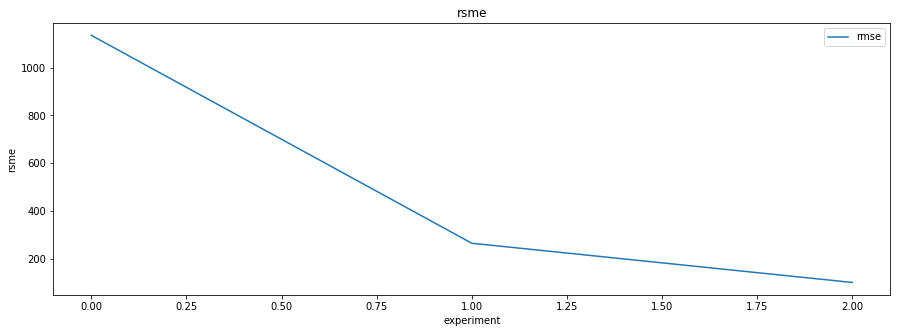

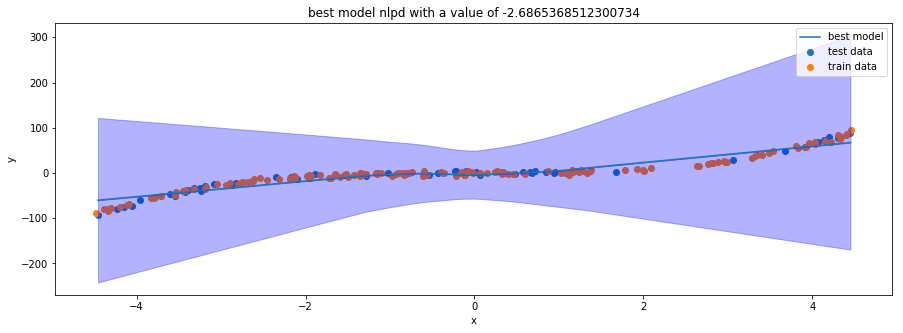

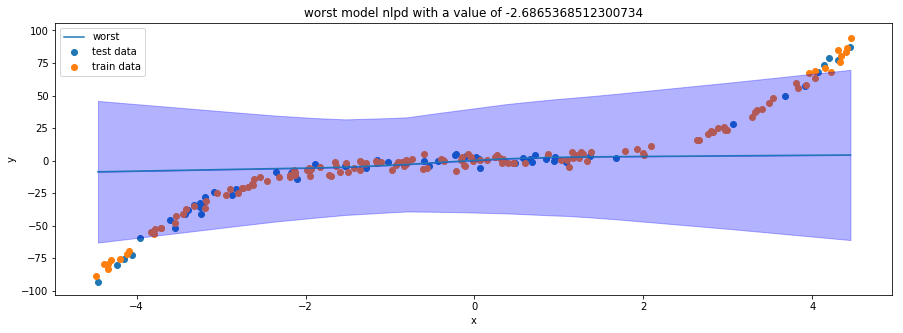

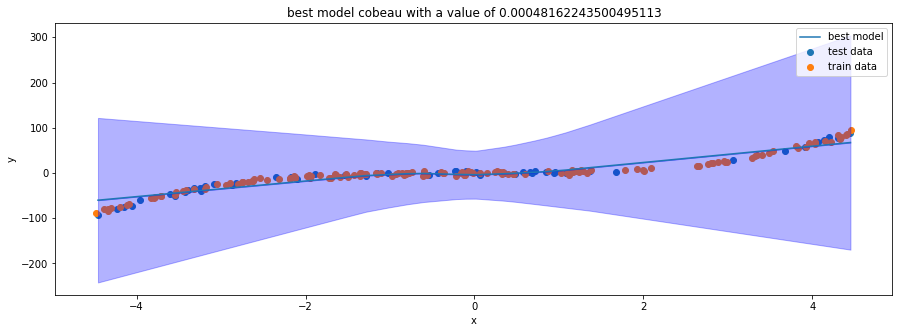

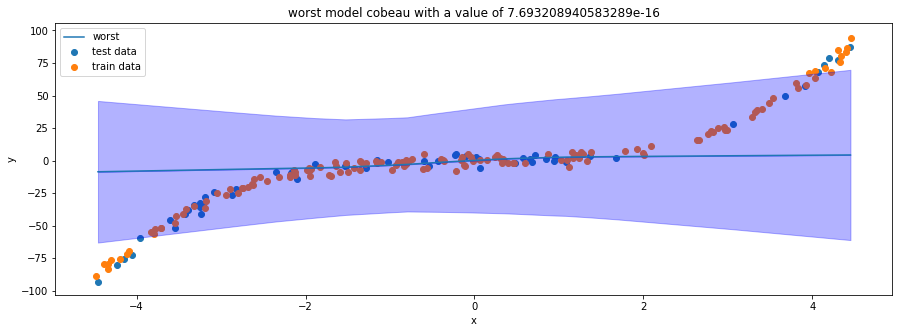

In [13]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)